In [23]:
# Importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

In [24]:
df = pd.read_csv("Student_Performance.csv")

In [25]:
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


df

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [27]:
df

(10000, 6)

In [28]:
#Encodage du colonne objet
from sklearn.preprocessing import LabelEncoder
df['Extracurricular Activities'] = LabelEncoder().fit_transform(df['Extracurricular Activities'])

In [29]:

df.columns = [col.replace(' ', '_') for col in df.columns]

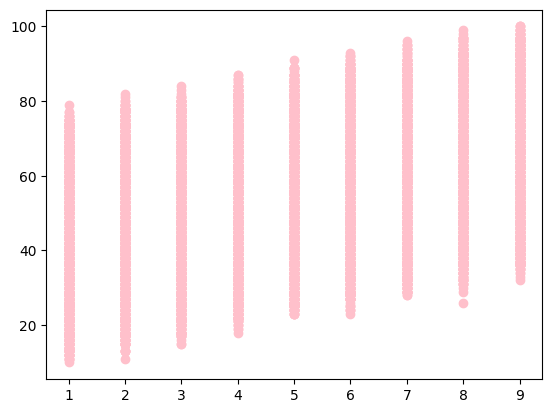

In [31]:
# Visualiser le scatter plot de la variable cible en fonction de la variable Hours Studied
plt.scatter(df.Hours_Studied.values, df.Performance_Index.values, color='pink')

In [ ]:
df

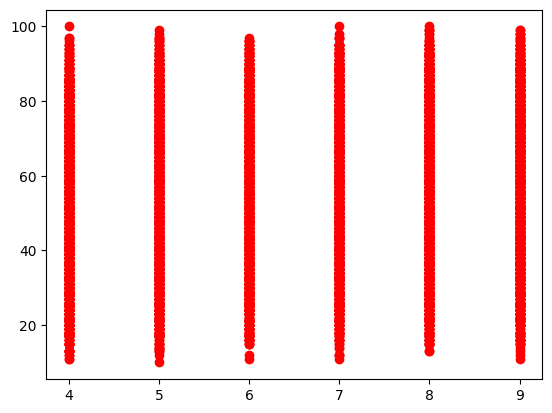

In [32]:
# Visualiser le scatter plot de la variable cible en fonction de la variable Sleep Hours
plt.scatter(df.Sleep_Hours.values, df.Performance_Index.values, color='red')

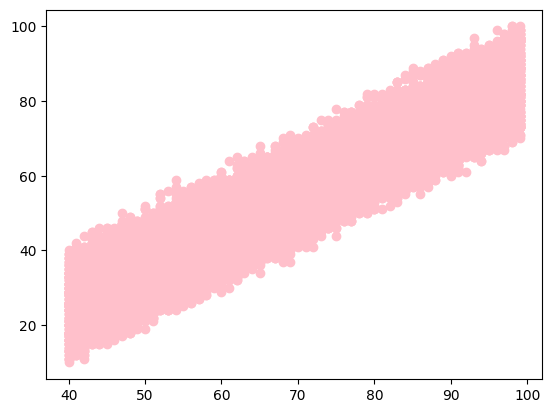

In [51]:
# Visualiser le scatter plot de la variable cible en fonction de la variable Previous Scores
plt.scatter(df.Previous_Scores.values, df.Performance_Index.values, color='pink')

In [33]:
#Fractionnement des données
X= df.drop('Performance_Index', axis=1).values
Y= df.Performance_Index.values 

In [35]:
#Normaliser les données (X)
from sklearn.preprocessing import StandardScaler
X= StandardScaler().fit_transform(X)


In [36]:
from sklearn.model_selection import train_test_split
#Splitter les données 
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
#Splitter les données en val et test
x_val, x_test, y_val, y_test= train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [37]:
#Affciher les dimensions
f"Dimensions des données train: {x_train.shape}, {y_train.shape}", f"Dimensions des données test: {x_test.shape}, {y_test.shape}", f"Dimensions des données validation: {x_val.shape}, {y_val.shape}"


('Dimensions des données train: (8000, 5), (8000,)',
 'Dimensions des données test: (1000, 5), (1000,)',
 'Dimensions des données validation: (1000, 5), (1000,)')

## Modélisation 

### Linear Regression

In [38]:
#importer linear regression
from sklearn.linear_model import LinearRegression
#Initialiser le modèle
lr = LinearRegression()
#Entraîner le modèle 
lr.fit(x_train, y_train)

LinearRegression()

In [39]:
#calculer R2 score et Mean Squarred Error
from sklearn.metrics import r2_score, mean_squared_error
y_pred = lr.predict(x_val)
print("R2 score: ", round(r2_score(y_pred, y_val),2), "----", "Mean Squared error :", round(mean_squared_error(y_pred,y_val),2))

R2 score:  0.99 ---- Mean Squared error : 4.16


### Ridge Regression

In [40]:
#Importer GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# recherche le apha optimal 
params = {
    'alpha': np.logspace(-8,8,100)
}
rr = Ridge()
grid_rr= GridSearchCV(rr, params, cv=5)
grid_rr.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8.11130831e-06, 1....
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])})

In [41]:
#Print du best paramètre

grid_rr.best_params_

{'alpha': 1e-08}

In [42]:
# Initialisation de modéle avec le alpha optimal
Rid_r = Ridge(alpha=151.99110829529394)
# Entraîner le modéle 
Rid_r.fit(x_train, y_train)

Ridge(alpha=151.99110829529394)

In [43]:
#calculer R2 score et Mean Squarred Error
y_pred = Rid_r.predict(x_val)
print("R2 score: ", round(r2_score(y_pred, y_val),2), "----", "Mean Squared error :", round(mean_squared_error(y_pred,y_val),2))

R2 score:  0.99 ---- Mean Squared error : 4.36


### Lasso Regression

In [44]:
#Importer Lasso Regression
from sklearn.linear_model import Lasso

# recherche le apha optimal 
params = {
    
    'alpha': np.logspace(-8,8,100)
}
lar = Lasso()
grid_lar = GridSearchCV(lar, params, cv=5)
grid_lar.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8.11130831e-06, 1....
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])})

In [45]:
#Print du best paramètre

grid_lar.best_params_

{'alpha': 0.00033516026509388476}

In [46]:
#Initialiser le modèle 

Lar = Lasso(alpha= 0.39442060594376643)

#Entraîner le modèle 
Lar.fit(x_train, y_train)

Lasso(alpha=0.39442060594376643)

In [47]:
#calculer R2 score et Mean Squarred Error
y_pred = Lar.predict(x_val)
print("R2 score: ", round(r2_score(y_pred, y_val),2), "----", "Mean Squared error :", round(mean_squared_error(y_pred,y_val),2))

R2 score:  0.99 ---- Mean Squared error : 4.86


####  Le linear Regression est le meilleur modèle au vu des mètriques (R2_score et Mean Squared error) donc c'est celui qui sera déployé 

### Prèdiction en utilisant le linear Regression

In [49]:
#Prédictions 
x_test_3= x_test[:3]

# Prédire les espérances de vie des trois zones
y_pred_3= lr.predict(x_test_3)
#Afficher les prèdictions 
for i in range(0,3):
    print('Le student', str(i), "a une performance de", np.round(y_pred_3[i],2), '---', y_test[i]) 

Le student 0 a une performance de 73.85 --- 74.0
Le student 1 a une performance de 64.31 --- 63.0
Le student 2 a une performance de 45.72 --- 47.0
